1. Primero cargamos la base de datos y las librerías que utilizaremos.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

# Cargar la base de datos.
df = pd.read_csv('adidas_sales_dataset.csv')

2. Limpiar la base de datos, detectar y corregir missing values y convertir datos no-numéricos a numéricos, quitar símbolos, etc.

In [77]:
print(df.isnull().sum())
# No contamos con missing values por lo que no hay nada que hacer por acá.

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


In [78]:
# Ahora observemos el DataFrame para decidir que datos convertiremos a numéricos.
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01/01/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,02/01/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,03/01/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,04/01/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,05/01/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [79]:
# Vamos a comenzar con la columna Region y haremos lo mismo para las demás que queremos categorizar por número.
# usaremos la función factorize para asignar por cada valor único, un número distinto.
numero, valor = pd.factorize(df['Region'])

# Ahora la columna tendrá los valores numéricos.
df['Region'] = numero

# Creamos un diccionario que haga la relación del número asignado por valor único
# y lo podamos visualizar.
region = dict(zip(valor, range(len(valor))))
region

# Esto último nos sirve para no olvidar que significa cada valor.

{'Northeast': 0, 'South': 1, 'West': 2, 'Midwest': 3, 'Southeast': 4}

In [80]:
#Haremos eso con todas las columnas categóricas no-numéricas.
numero, valor = pd.factorize(df['Retailer'])
df['Retailer'] = numero
retailer = dict(zip(valor, range(len(valor))))
retailer

{'Foot Locker': 0,
 'Walmart': 1,
 'Sports Direct': 2,
 'West Gear': 3,
 "Kohl's": 4,
 'Amazon': 5}

In [81]:
numero, valor = pd.factorize(df['City'])
df['City'] = numero
city = dict(zip(valor, range(len(valor))))
city

{'New York': 0,
 'Houston': 1,
 'San Francisco': 2,
 'Los Angeles': 3,
 'Chicago': 4,
 'Dallas': 5,
 'Philadelphia': 6,
 'Las Vegas': 7,
 'Denver': 8,
 'Seattle': 9,
 'Miami': 10,
 'Minneapolis': 11,
 'Billings': 12,
 'Knoxville': 13,
 'Omaha': 14,
 'Birmingham': 15,
 'Portland': 16,
 'Anchorage': 17,
 'Honolulu': 18,
 'Orlando': 19,
 'Albany': 20,
 'Cheyenne': 21,
 'Richmond': 22,
 'Detroit': 23,
 'St. Louis': 24,
 'Salt Lake City': 25,
 'New Orleans': 26,
 'Boise': 27,
 'Phoenix': 28,
 'Albuquerque': 29,
 'Atlanta': 30,
 'Charleston': 31,
 'Charlotte': 32,
 'Columbus': 33,
 'Louisville': 34,
 'Jackson': 35,
 'Little Rock': 36,
 'Oklahoma City': 37,
 'Wichita': 38,
 'Sioux Falls': 39,
 'Fargo': 40,
 'Des Moines': 41,
 'Milwaukee': 42,
 'Indianapolis': 43,
 'Baltimore': 44,
 'Wilmington': 45,
 'Newark': 46,
 'Hartford': 47,
 'Providence': 48,
 'Boston': 49,
 'Burlington': 50,
 'Manchester': 51}

In [82]:
numero, valor = pd.factorize(df['Product'])
df['Product'] = numero
product = dict(zip(valor, range(len(valor))))
product

{"Men's Street Footwear": 0,
 "Men's Athletic Footwear": 1,
 "Women's Street Footwear": 2,
 "Women's Athletic Footwear": 3,
 "Men's Apparel": 4,
 "Women's Apparel": 5}

In [83]:
numero, valor = pd.factorize(df['Sales Method'])
df['Sales Method'] = numero
sales = dict(zip(valor, range(len(valor))))
sales

{'In-store': 0, 'Outlet': 1, 'Online': 2}

In [84]:
numero, valor = pd.factorize(df['State'])
df['State'] = numero
state = dict(zip(valor, range(len(valor))))
state

{'New York': 0,
 'Texas': 1,
 'California': 2,
 'Illinois': 3,
 'Pennsylvania': 4,
 'Nevada': 5,
 'Colorado': 6,
 'Washington': 7,
 'Florida': 8,
 'Minnesota': 9,
 'Montana': 10,
 'Tennessee': 11,
 'Nebraska': 12,
 'Alabama': 13,
 'Maine': 14,
 'Alaska': 15,
 'Hawaii': 16,
 'Wyoming': 17,
 'Virginia': 18,
 'Michigan': 19,
 'Missouri': 20,
 'Utah': 21,
 'Oregon': 22,
 'Louisiana': 23,
 'Idaho': 24,
 'Arizona': 25,
 'New Mexico': 26,
 'Georgia': 27,
 'South Carolina': 28,
 'North Carolina': 29,
 'Ohio': 30,
 'Kentucky': 31,
 'Mississippi': 32,
 'Arkansas': 33,
 'Oklahoma': 34,
 'Kansas': 35,
 'South Dakota': 36,
 'North Dakota': 37,
 'Iowa': 38,
 'Wisconsin': 39,
 'Indiana': 40,
 'West Virginia': 41,
 'Maryland': 42,
 'Delaware': 43,
 'New Jersey': 44,
 'Connecticut': 45,
 'Rhode Island': 46,
 'Massachusetts': 47,
 'Vermont': 48,
 'New Hampshire': 49}

In [85]:
#Quitaremos aquellos símbolos que pudieran hacer ruido 
#por ejemplo, los signos de peso y porcentaje.
df['Price per Unit'] = df['Price per Unit'].str.replace('$', '')
df['Total Sales'] = df['Total Sales'].str.replace('$', '')
df['Operating Profit'] = df['Operating Profit'].str.replace('$', '')
df['Operating Margin'] = df['Operating Margin'].str.replace('%', '')
df['Units Sold'] = df['Units Sold'].str.replace(',', '')
df['Total Sales'] = df['Total Sales'].str.replace(',', '')
df['Operating Profit'] = df['Operating Profit'].str.replace(',', '')

<ipython-input-85-7aeb6051a593>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price per Unit'] = df['Price per Unit'].str.replace('$', '')
<ipython-input-85-7aeb6051a593>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Total Sales'] = df['Total Sales'].str.replace('$', '')
<ipython-input-85-7aeb6051a593>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Operating Profit'] = df['Operating Profit'].str.replace('$', '')


In [86]:
# Observamos nuestra base de datos ya limpia.
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,0,1185732,01/01/2020,0,0,0,0,50.00,1200,600000,300000,50,0
1,0,1185732,02/01/2020,0,0,0,1,50.00,1000,500000,150000,30,0
2,0,1185732,03/01/2020,0,0,0,2,40.00,1000,400000,140000,35,0
3,0,1185732,04/01/2020,0,0,0,3,45.00,850,382500,133875,35,0
4,0,1185732,05/01/2020,0,0,0,4,60.00,900,540000,162000,30,0


3. Haremos un pequeño análisis exploratorio de los datos, vamos a visualizar las relaciones entre algunas variables.

In [87]:
# Como queremos estimar las ventas, podemos elegir tanto la variable 'Units Sold' y 'Total Sales'
# vamos a elegir la variable 'Units Sold' ya que las ventas contienen cantidades más grandes 
# y sobre todo para hacer gráficas estaría mejor valores más pequeños.
# nuestra variable objetivo es te tipo 'object', entonces para poder realizar gráficas
# lo convertiremos a tipo 'int64'
df["Units Sold"] = df["Units Sold"].astype(int)

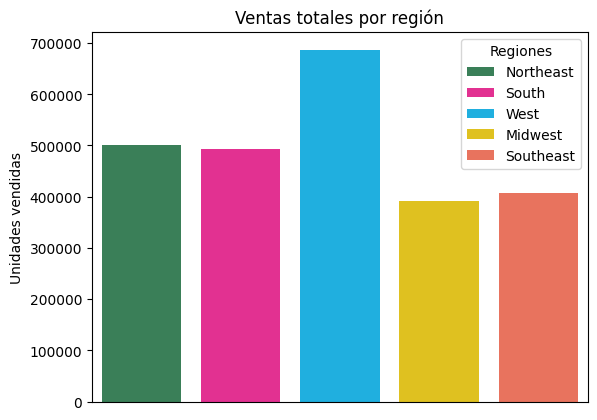

In [88]:
# Vamos a visualizar las unidades totales vendidas por región.
# Obtenemos los valores únicos de la región para luego graficarlos en el eje x.
val_unicos = df["Region"].unique()

# Hacemos un groupby para obtener la suma de las unidades vendidas dada la región,
# esto para el eje y.
ventas_region = df.groupby("Region")["Units Sold"].sum()

# Recopilamos el nombre de cada región y hacemos un DataFrame.
regiones = ['Northeast', 'South', 'West', 'Midwest', 'Southeast']
data = {'Región': val_unicos, 'Unidades vendidas': ventas_region, 'Regiones': regiones}
df2 = pd.DataFrame(data)

# Definimos un color para cada región.
colores = {'Northeast': 'seagreen', 'South': 'deeppink', 'West': 'deepskyblue', 'Midwest': 'gold', 'Southeast': 'tomato'}

# Creamos el gráfico de barras con colores personalizados.
sns.barplot(x='Región', y='Unidades vendidas', hue='Regiones', data=df2, palette=colores,width=0.8, dodge=False)

# Título del gráfico.
plt.title("Ventas totales por región")

# Eliminamos el título del eje x.
plt.xlabel('')

# eliminar los valores del eje x.
plt.xticks([])

# #Mostramos el gráfico.
plt.show()

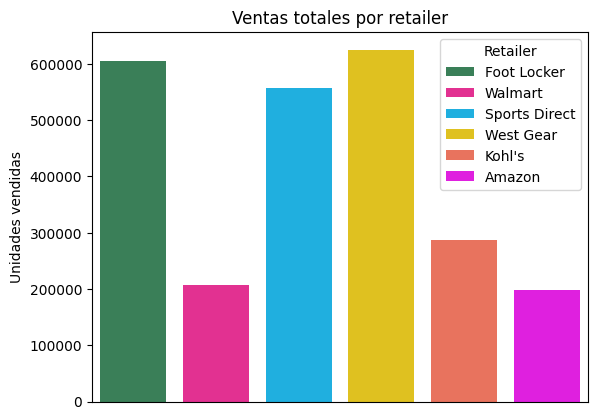

In [89]:
# Ahora vamos a visualizar las unidades totales vendidas por retailer.
val_unicos = df["Retailer"].unique()
ventas_ret = df.groupby("Retailer")["Units Sold"].sum()
retailer = ['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's", 'Amazon']
data = {'Retailers': val_unicos, 'Unidades vendidas': ventas_ret, 'Retailer': retailer}
df2 = pd.DataFrame(data)
colores = {'Foot Locker': 'seagreen', 'Walmart': 'deeppink', 'Sports Direct': 'deepskyblue', 'West Gear': 'gold', "Kohl's": 'tomato', 'Amazon': 'magenta'}
sns.barplot(x='Retailers', y='Unidades vendidas', hue='Retailer', data=df2, palette=colores,width=0.8, dodge=False)
plt.title("Ventas totales por retailer")
plt.xlabel('')
plt.xticks([])
plt.show()

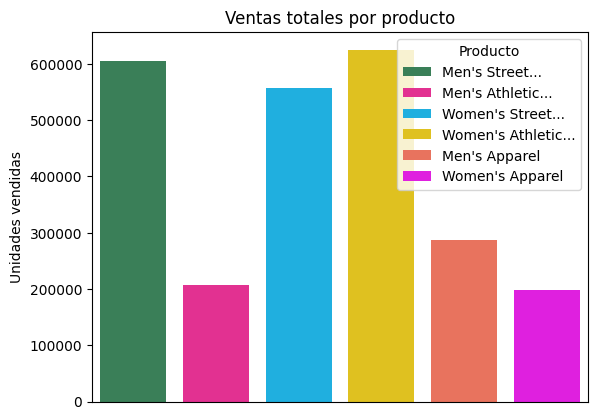

In [105]:
# Ahora vamos a visualizar las unidades totales vendidas por producto.
val_unicos = df["Product"].unique()
ventas_pro = df.groupby("Product")["Units Sold"].sum()
{"Men's Street Footwear": 0,
 "Men's Athletic Footwear": 1,
 "Women's Street Footwear": 2,
 "Women's Athletic Footwear": 3,
 "Men's Apparel": 4,
 "Women's Apparel": 5}
producto = ["Men's Street...", "Men's Athletic...", "Women's Street...", "Women's Athletic...", "Men's Apparel", "Women's Apparel"]
data = {'Productos': val_unicos, 'Unidades vendidas': ventas_ret, 'Producto': producto}
df2 = pd.DataFrame(data)
colores = {"Men's Street...": 'seagreen', "Men's Athletic...": 'deeppink', "Women's Street...": 'deepskyblue', "Women's Athletic...": 'gold', "Men's Apparel": 'tomato', "Women's Apparel": 'magenta'}
sns.barplot(x='Productos', y='Unidades vendidas', hue='Producto', data=df2, palette=colores,width=0.8, dodge=False)
plt.title("Ventas totales por producto")
plt.xlabel('')
plt.xticks([])
plt.show()

5. Realizaremos predicciones para las unidades vendidas utilizando el algoritmo Random Forest Regressor.

In [91]:
# Nuestros features estarán en la variable X.
X = df.drop(['Invoice Date','Units Sold'], axis=1)

# Nuestra variable objetivo será la y.
y = df['Units Sold']

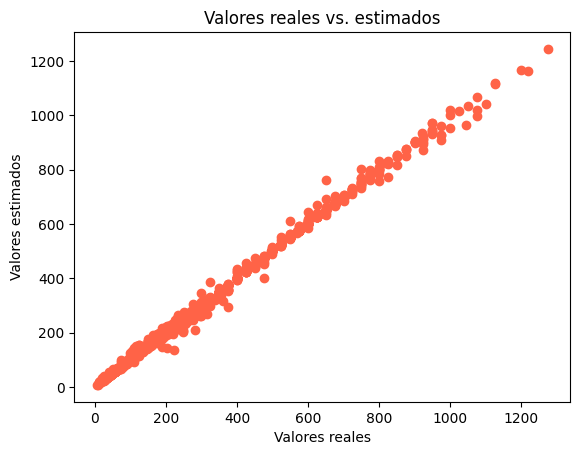

In [92]:
# Obtenemos nuestro conjunto de entrenamiento y de prueba, este último será de tamaño 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Establecemos nuestro modelo, en este caso con parametros default.
rf_model = RandomForestRegressor()

# Entrenamos al modelo.
rf_model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba.
y_pred = rf_model.predict(X_test)

# Graficamos los valores reales vs los valores estimados.
plt.scatter(y_test, y_pred, c='tomato')
plt.xlabel('Valores reales')
plt.ylabel('Valores estimados')
plt.title('Valores reales vs. estimados')
plt.show()

In [93]:
# Evaluaremos el performance con dos métricas el Error Cuadrático Medio y el R-squared score.
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean squared error: 100.95395445595854
R-squared: 0.9978611749439295


<Axes: >

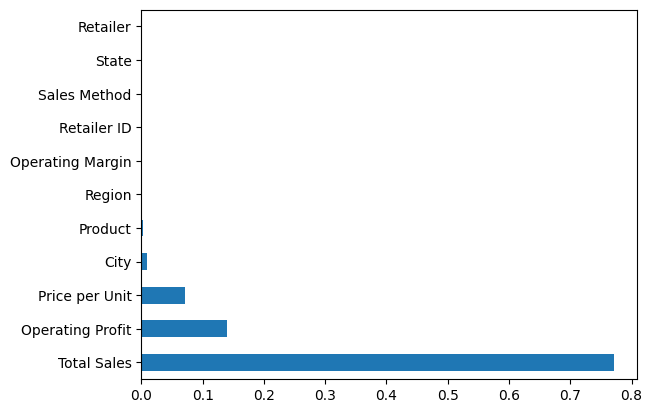

In [96]:
# Haremos un análisis de importancia de características, esto servirá para observar cuales features aportan mucho o poco
# a la predicción y si vale la pena dejarlas o quitarlas.
importancia = pd.Series(rf_model.feature_importances_, index=X.columns)

# Ordemos en orden descendente.
importancia_or = importancia.sort_values(ascending=False)

# Graficamos.
importancia_or.plot(kind='barh')

In [97]:
# De la gráfica podemos observar que la característica 'Total Sales' parece ser la más importante.
# esto pasa porque esa y la de unidades vendidas nos dicen lo mismo, para obtener resultados reales,
# debemos quitarla del modelo.

# Nuestra nueva X no tendrá la variable 'Total Sales'.
X = df.drop(['Invoice Date','Units Sold','Total Sales'], axis=1)
y = df['Units Sold']

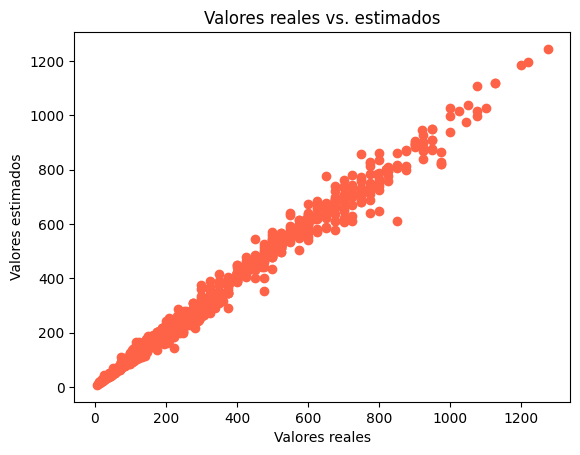

In [98]:
#Realizamos exactamente lo mismo que arriba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
plt.scatter(y_test, y_pred, c='tomato')
plt.xlabel('Valores reales')
plt.ylabel('Valores estimados')
plt.title('Valores reales vs. estimados')
plt.show()

In [99]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean squared error: 445.83917321243524
R-squared: 0.9905543869006089


<Axes: >

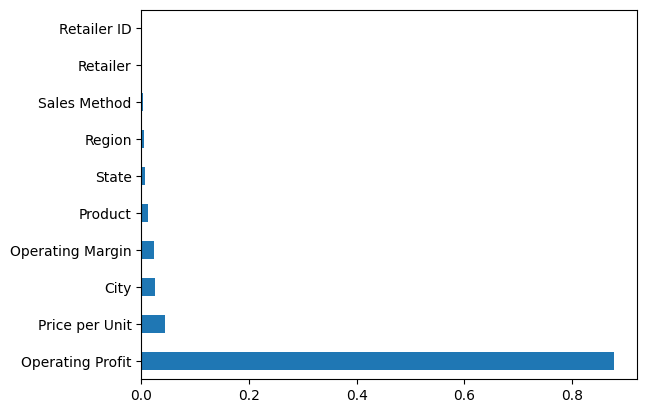

In [100]:
#Hacemos de nuevo el análisis de importancia de características.
importancia = pd.Series(rf_model.feature_importances_, index=X.columns)
importancia_or = importancia.sort_values(ascending=False)
importancia_or.plot(kind='barh')

In [101]:
# Observamos que hay features que no tienen mucha relvancia así que los retiraremos, volvemos a correr el modelo.
X = df.drop(['Invoice Date','Units Sold','Total Sales','Retailer','Retailer ID','Sales Method','Region','State'], axis=1)
y = df['Units Sold']

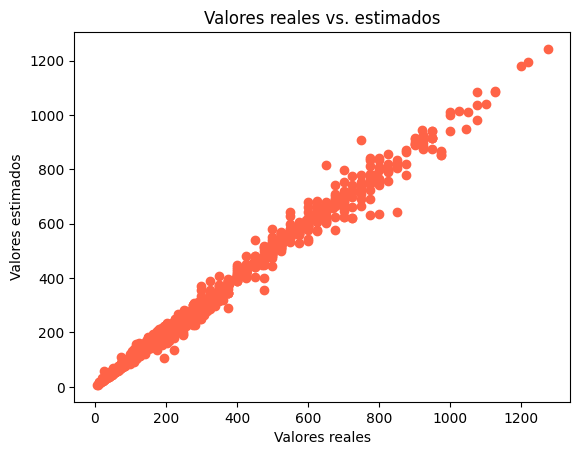

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
plt.scatter(y_test, y_pred, c='tomato')
plt.xlabel('Valores reales')
plt.ylabel('Valores estimados')
plt.title('Valores reales vs. estimados')
plt.show()

In [103]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean squared error: 396.5566943005181
R-squared: 0.9915984926148438


In [104]:
# Por último realizaremos un Grid Search que nos indique los parámetros con los que podríamos obtener
# mejores predicciones.

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Definimos el modelo y el grid_search.
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Ejecutamos el Grid Search.
grid_search.fit(X, y)

# Imprimimos los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mejores parámetros: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


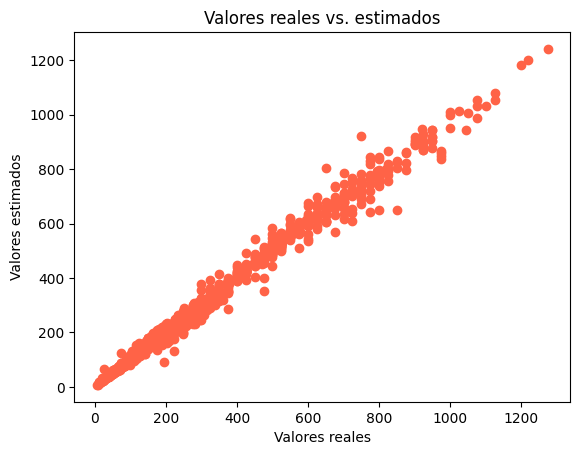

In [106]:
# Haremos un último modelo con los parámetros otorgados por el Grid Search y vamos a observar si nos da 
# un mejor resultado.
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_leaf=1, min_samples_split= 2,max_features = 'auto')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
plt.scatter(y_test, y_pred, c='tomato')
plt.xlabel('Valores reales')
plt.ylabel('Valores estimados')
plt.title('Valores reales vs. estimados')
plt.show()


In [107]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean squared error: 404.18177461139896
R-squared: 0.9914369465623751
